In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from cwgp.cwgp import CWGP
from cwgp.kernel import RBF
import GPy
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
CSV_FIlE = "japan3.csv"
df = pd.read_csv(CSV_FIlE)
age = 50
df_all = {}
df_all[age]= df[(df["age"]==age)]

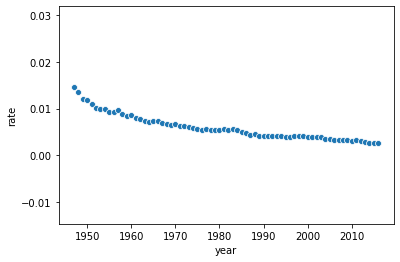

In [3]:
sns.scatterplot(df_all[age]["year"],df_all[age]["rate"])

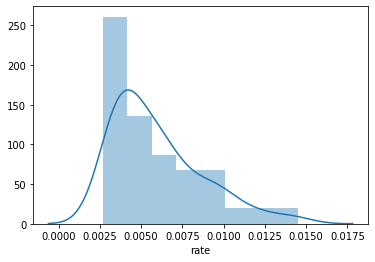

In [4]:
sns.distplot(df_all[age]["rate"])

In [5]:
rate = df_all[age]["rate"].to_numpy().reshape(-1,1)
year = df_all[age]["year"].to_numpy().reshape(-1,1)

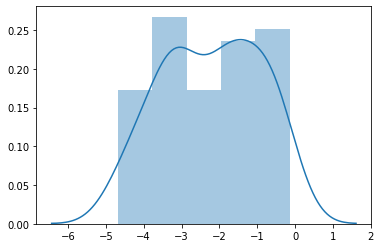

In [6]:
t_1 = CWGP("box_cox",n=2)
p_1 = t_1.fit(rate).x
x_1, d = t_1.phi.comp_phi(p_1,rate)
sns.distplot(x_1)

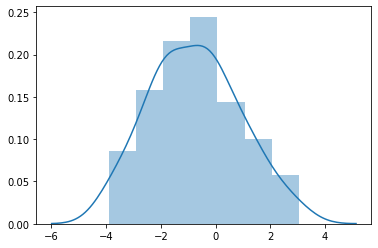

In [7]:
t_2 = CWGP("sa",n=2)
p_2 = t_2.fit(x_1).x
x_2, d = t_2.phi.comp_phi(p_2,x_1)
sns.distplot(x_2)

In [8]:
kernel = GPy.kern.Matern32(1)

X_train, X_test, y_train, y_test = train_test_split(dataset[:,0],dataset[:,1],test_size=0.33, random_state=42)

model_cwgp = GPy.models.GPRegression(X_train.reshape(-1,1),y_train.reshape(-1,1), kernel=kernel)
model_cwgp.optimize()
print(model_cwgp)
model_cwgp.plot(plot_limits=[1940,2030])

plt.title('Age ' + str(age))
plt.xlabel('Year')
plt.ylabel('Mortality Rate')

plt.grid(True)
plt.show()

NameError: name 'dataset' is not defined

In [ ]:
data = []
start,end = 1940,2031
time_span = end-start
for i in range(start,end):
    data.append(model_cwgp.predict(np.array(i).reshape(1,-1)))
tr_data = np.array(data).reshape(-1,1,2)
tr_data = np.concatenate((tr_data, np.arange(start,end).reshape(-1,1,1)), axis=2)

In [ ]:
tr_data

In [ ]:
CI = 1.96
mean = tr_data[:,:,[0,2]]
var_upper = mean + CI*np.sqrt(tr_data[:,:,1])
var_lower = mean - CI*np.sqrt(tr_data[:,:,1])
predict_mean = t_2.phi.inv_comp_phi(p_2,mean[:,0])
predict_mean = t_1.phi.inv_comp_phi(p_1,predict_mean[:,0])
predict_var_upper = t_2.phi.inv_comp_phi(p_2,var_upper)
predict_var_upper = t_1.phi.inv_comp_phi(p_1,predict_var_upper)
predict_var_lower = t_2.phi.inv_comp_phi(p_2,var_lower)
predict_var_lower = t_1.phi.inv_comp_phi(p_1,predict_var_lower)

In [ ]:
plt.fill_between(np.linspace(start,end,time_span),np.ravel(predict_var_upper),np.ravel(predict_var_lower),color=(0,0.5,0.5,0.2), label="Confidence")
plt.scatter(X_train, t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,y_train)), marker="x", color='black', label="data")
plt.scatter(X_test, t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,y_test)), marker="x", color='red')
plt.plot(np.linspace(start,end,time_span),predict_mean, label="mean")
plt.legend()
plt.ylim([-0.01,0.02])


In [ ]:
mean

In [ ]:
t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,X_test))

In [ ]:
train_df = pd.DataFrame({"train":X_train,"test":t_1.phi.inv_comp_phi(p_1,t_2.phi.inv_comp_phi(p_2,Y_train)).reshape(-1)})
predict_df = pd.DataFrame({"year":mean[:,:,1].reshape(-1),"prediction": predict_mean})

In [ ]:
train_df

In [ ]:
predict_df

In [ ]:
rmse = np.sqrt(np.sum((np.ravel(predict_mean[70:77])-df_all[age].rate[train_up:])**2)/n)
mae = np.sum(np.abs(np.ravel(predict_mean[70:77])-df_all[age].rate[train_up:]))/n

rmse,mae